# РК ИУ5-61Б Пахомкин Кирсан

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('states_all_extended.csv')

In [3]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
parts = np.split(data, [10], axis=1)
data = parts[0]

In [5]:
data.dtypes

PRIMARY_KEY                object
STATE                      object
YEAR                       object
ENROLL                     object
TOTAL_REVENUE              object
FEDERAL_REVENUE            object
STATE_REVENUE              object
LOCAL_REVENUE              object
TOTAL_EXPENDITURE          object
INSTRUCTION_EXPENDITURE    object
dtype: object

In [6]:
data.drop(['ENROLL','PRIMARY_KEY'], axis = 1, inplace = True)

In [7]:
le = LabelEncoder()
le.fit(data.STATE.drop_duplicates()) 
data.STATE = le.transform(data.STATE)

In [8]:
data['YEAR'] = data['YEAR'].replace(0,np.nan)
data['YEAR'] = data['YEAR'].fillna(data['YEAR'].mean())
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].replace(0,np.nan)
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].fillna(data['TOTAL_REVENUE'].mean())
data['FEDERAL_REVENUE'] = data['FEDERAL_REVENUE'].replace(0,np.nan)
data['FEDERAL_REVENUE'] = data['FEDERAL_REVENUE'].fillna(data['FEDERAL_REVENUE'].mean())
data['STATE_REVENUE'] = data['STATE_REVENUE'].replace(0,np.nan)
data['STATE_REVENUE'] = data['STATE_REVENUE'].fillna(data['STATE_REVENUE'].mean())
data['LOCAL_REVENUE'] = data['LOCAL_REVENUE'].replace(0,np.nan)
data['LOCAL_REVENUE'] = data['LOCAL_REVENUE'].fillna(data['LOCAL_REVENUE'].mean())
data['TOTAL_EXPENDITURE'] = data['TOTAL_EXPENDITURE'].replace(0,np.nan)
data['TOTAL_EXPENDITURE'] = data['TOTAL_EXPENDITURE'].fillna(data['TOTAL_EXPENDITURE'].mean())
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].replace(0,np.nan)
data['INSTRUCTION_EXPENDITURE'] = data['INSTRUCTION_EXPENDITURE'].fillna(data['INSTRUCTION_EXPENDITURE'].mean())

In [9]:
data.isnull().sum()
# проверим есть ли пропущенные значения

STATE                      0
YEAR                       0
TOTAL_REVENUE              0
FEDERAL_REVENUE            0
STATE_REVENUE              0
LOCAL_REVENUE              0
TOTAL_EXPENDITURE          0
INSTRUCTION_EXPENDITURE    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    1715 non-null   int64  
 1   YEAR                     1715 non-null   int64  
 2   TOTAL_REVENUE            1715 non-null   float64
 3   FEDERAL_REVENUE          1715 non-null   float64
 4   STATE_REVENUE            1715 non-null   float64
 5   LOCAL_REVENUE            1715 non-null   float64
 6   TOTAL_EXPENDITURE        1715 non-null   float64
 7   INSTRUCTION_EXPENDITURE  1715 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 107.3 KB


In [11]:
data.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE
0,0,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0
1,1,1992,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0
2,2,1992,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0
3,3,1992,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0
4,4,1992,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0


<AxesSubplot:>

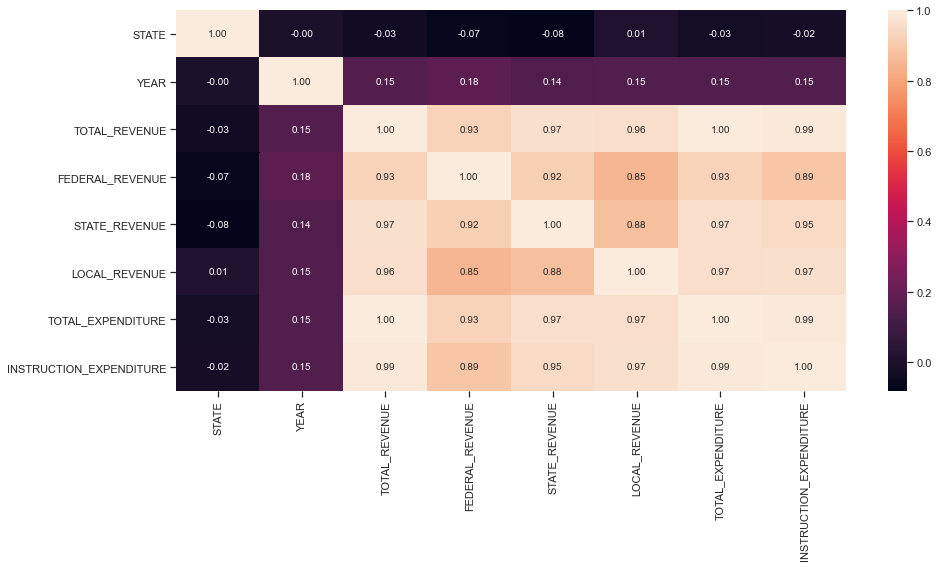

In [12]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [13]:
X = data.drop(['TOTAL_EXPENDITURE'], axis = 1)
Y = data.TOTAL_EXPENDITURE
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    STATE  YEAR  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
0      0  1992      2678885.0         304177.0      1659028.0       715680.0   
1      1  1992      1049591.0         106780.0       720711.0       222100.0   
2      2  1992      3258079.0         297888.0      1369815.0      1590376.0   
3      3  1992      1711959.0         178571.0       958785.0       574603.0   
4      4  1992     26260025.0        2072470.0     16546514.0      7641041.0   

   INSTRUCTION_EXPENDITURE  
0                1481703.0  
1                 498362.0  
2                1435908.0  
3                 964323.0  
4               14358922.0   

Выходные данные:

 0     2653798.0
1      972488.0
2     3401580.0
3     1743022.0
4    27138832.0
Name: TOTAL_EXPENDITURE, dtype: float64


In [14]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       STATE  YEAR  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
82       33  1993   1.217194e+06    154018.000000   8.977250e+05   
1579     45  1989   9.102045e+06    767779.864314   4.308218e+06   
1544     40  1989   9.102045e+06    767779.864314   4.308218e+06   
1323      6  2017   9.102045e+06    767779.864314   4.308218e+06   
249      47  1996   9.652380e+05     36693.000000   2.156570e+05   

      LOCAL_REVENUE  INSTRUCTION_EXPENDITURE  
82     1.654510e+05             5.877530e+05  
1579   4.110522e+06             4.768010e+06  
1544   4.110522e+06             4.768010e+06  
1323   4.110522e+06             4.768010e+06  
249    7.128880e+05             4.245620e+05   

Входные параметры тестовой выборки:

       STATE  YEAR  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
1101     32  2013   2.807010e+07     1.145079e+06   1.098613e+07   
6         6  1992   3.834302e+06     1.435420e+05   1.342539e+06   
746      34  2006   4.7018

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [16]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

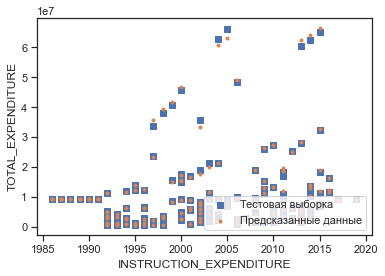

In [17]:
plt.scatter(X_test.YEAR, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.YEAR, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('INSTRUCTION_EXPENDITURE')
plt.ylabel ('TOTAL_EXPENDITURE')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [20]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 138734.77325582213
Средняя квадратичная ошибка: 142889066665.99045
Median absolute error: 19317.29999999993
Коэффициент детерминации: 0.9990572084607852


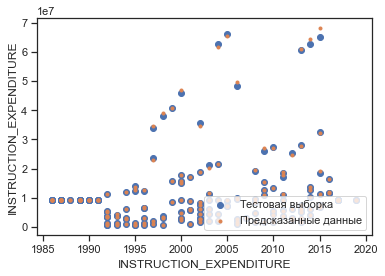

In [21]:
plt.scatter(X_test.YEAR, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.YEAR, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.ylabel('INSTRUCTION_EXPENDITURE')
plt.show()